# Homework 1 #

In this problem you will explore some consequences of the ocean's nonlinear equation of state. Then you will make some calculations regarding air-sea fluxes. Each question is worth 20%. There is an _optional_ bonus question at the end which is worth 10 points towards any future homework.

First import numpy, matplotlib, and the Gibbs sea water package.

In [108]:
import numpy, matplotlib as m, gsw as sw
# but also...
import matplotlib.pyplot as plt, seaborn
%matplotlib inline
# Random params
SF = 3 # round to 3 decimal places

## 1) Cabbeling ##

You make two measurements of seawater with a CTD.

| |T (in-situ temperature, $^\circ$C) |S$_p$ (Practical Salinity, PSU)|
|--|--------|-----------------------|
|Measurement 1| 0.0 | 31.0  |
|Measurement 2 | 16.45 | 34.0 |

The measurements are taken at the surface ($p=0$ dbar) in the North Atlantic Ocean, coordinates 45N latitude, 30E longitude.

First convert the measurments to absolute salinity and conservative temperature.

In [109]:
# T (in-situ temperature, C)
T1  =  0.0
T2  =  16.45
# Sp (Practical Salinity, PSU)
S1  =  31.0
S2  =  32.0
# P (Pressure at surface, dbar)
p0  =  0

# Coordiantes
lat =  45        # N
lon = -30        # E

# calc absolute salinity 
Sa1 = sw.SA_from_SP(S1,p0,lon,lat)
Sa2 = sw.SA_from_SP(S2,p0,lon,lat)

# calc conservative temperature
Tc1 = sw.CT_from_t(Sa1,T1,p0)
Tc2 = sw.CT_from_t(Sa2,T2,p0)

Now calculate the density of each water parcel? Which water mass is denser? What is their average density?

In [110]:
rho1 = sw.rho(Sa1,T1,p0)
rho2 = sw.rho(Sa2,T2,p0)

print"Measurement 1 is", round(rho1-rho2,SF),"kg/m^2 denser than measurement 2."
print"Their average density is",round((rho1+rho2)/2,SF),"."

Measurement 1 is 1.521 kg/m^2 denser than measurement 2.
Their average density is 1024.121 .


Now allow the two water masses to mix. When they mix, they homogenize their conservative temperature and absolute salinity. What is the density of the new water mass?

In [111]:
# Mixing!
T3  = (T1+T2)/2
Sa3 = (Sa1+Sa2)/2
# Calc new desnity
rho3 = sw.rho(Sa3,T3,p0) #sw.rho_CT() doesn't work, so I used rho(Sa,t,p)
print"The density of the new water mass is",round(rho3,SF),"kg/m^2."
print"The density of the new water mass is > rho1("+str(round(rho1,SF))+") and < rho2("+str(round(rho2,SF))+"), and",\
    round(rho3-(rho1+rho2)/2,SF),"kg/m^2 denser than the average of the two water masses."

The density of the new water mass is 1024.503 kg/m^2.
The density of the new water mass is > rho1(1024.882) and < rho2(1023.361), and 0.381 kg/m^2 denser than the average of the two water masses.


Discuss your result. How does the density of the mixed seawater compare to that of the two source water masses?

## 2) Stratification and Thermobaricity ##

You are on cruise in the Anarctic (65S latitude, 20E longitude). You make two measurements:

| |T (in-situ temperature, $^\circ$C) |S$_p$ (Practical Salinity, PSU)| Pressure (dbar) | 
|--|--------|-----------------------|
|Measurement 1| -1.8 | 33.0  | 0 | 
|Measurement 2 | 0.0 | 33.2 | 20 |

Assess the stability of the water column by comparing the densities of the two water masses referenced to the same pressue (i.e. use potential density). Is the water column stably stratified in this region?

In [112]:
lat = -65       # S
lon = -20       # E

# T (in-situ temperature, C)
T1  = -1.8
T2  =  0.0

# Sp (Practical Salinity, PSU)
S1  = 33.0
S2  = 33.2

# P (Pressure, dbar))
p1  = 0
p2  = 20
pr  = 0 #reference pressure at the surface

# calc absolute salinity 
Sa1=sw.SA_from_SP(S1,p1,lon,lat)
Sa2=sw.SA_from_SP(S2,p2,lon,lat)
# calc conservative temperature
Tc1 = sw.CT_from_t(Sa1,T1,p1)
Tc2 = sw.CT_from_t(Sa2,T2,p2)
# calc rho
rho1 = sw.rho_CT_exact(Sa1,Tc1,pr)
rho2 = sw.rho_CT_exact(Sa2,Tc2,pr)

print"The water mass from the first measurement at the surface has a density of",round(rho1,SF),\
"kg/m^2 which is",round(rho1-rho2,SF)*(-1),"kg/m^2 less dense than water mass below ("+str(round(rho2,SF))+"kg/m^2)...\nCreating stable stratification."

The water mass from the first measurement at the surface has a density of 1026.562 kg/m^2 which is 0.097 kg/m^2 less dense than water mass below (1026.659kg/m^2)...
Creating stable stratification.


Now imagine that ocean circulation transports the same two water masses to pressures of 4990 dbar and 5010 dbar respectively. (One is still approx 20 m deeper than the other.) Compare the two potential densities using the mid-point reference pressure of 5000 dbar. How does the stratification differ?

In [113]:
# new Pressures
p3 =  4990
p4 =  5010
pr2 =  5000

# Calc absolute sal and conserv. T
Sa1=sw.SA_from_SP(S1,p3,lon,lat)
Sa1=sw.SA_from_SP(S2,p4,lon,lat)
Tc1 = sw.CT_from_t(Sa1,T1,p3)
Tc2 = sw.CT_from_t(Sa2,T2,p4)
# Calc density
rho3 = sw.rho_CT_exact(Sa1,Tc1,pr2)
rho4 = sw.rho_CT_exact(Sa2,Tc2,pr2)
print"\nWhen the same two water masses are brought down ~5000 m, the upper water mass has a desnity of",round(rho3,SF),\
"which is",round(rho3-rho4,SF),"kg/m^2 more desne than the water mass below("+str(round(rho4,SF))+")...\nThis resulting in vertical instability and convective mixing."


When the same two water masses are brought down ~5000 m, the upper water mass has a desnity of 1049.618 which is 0.314 kg/m^2 more desne than the water mass below(1049.304)...
This resulting in vertical instability and convective mixing.


## 3) ARGO Profile Analysis ##

In this problem, you will learn how to access, plot, and make calculations with ARGO data.

In order to get the data, you have to install two special anaconda packages. To do this, run the following commands from your command line (not from the python interpreter):

    conda install netcdf4
    conda install xray

(If you want to run them inside your IPython notebook, just preceed them with an "!" symbol.)

The code below will use [xray](http://xray.readthedocs.org) to connect to an online database of ARGO data and access a profile from July.

In [114]:
import xray
argo = xray.open_dataset('http://data.nodc.noaa.gov/opendap/argo/data/pacific/2015/08/nodc_R5903323_203.nc')

Explore the ARGO profile by simply typing ``print argo`` on the next line. xray will give you a summary of the contents of the dataset. (Review the [xray documentation](http://xray.readthedocs.org) to learn more about how to interact with the data.)

In [115]:
print argo

<xray.Dataset>
Dimensions:                       (n_calib: 1, n_history: 3, n_levels: 56, n_param: 3, n_prof: 1)
Coordinates:
  * n_calib                       (n_calib) int64 0
  * n_history                     (n_history) int64 0 1 2
  * n_levels                      (n_levels) int64 0 1 2 3 4 5 6 7 8 9 10 11 ...
  * n_param                       (n_param) int64 0 1 2
  * n_prof                        (n_prof) int64 0
Data variables:
    data_type                     object ...
    format_version                object ...
    handbook_version              object ...
    reference_date_time           object ...
    date_creation                 object ...
    date_update                   object ...
    direction                     object ...
    data_mode                     object ...
    juld_qc                       object ...
    position_qc                   object ...
    profile_pres_qc               object ...
    profile_temp_qc               object ...
    profile_psal_qc 

Answer the following questions about the data based on the output above:

1. What are the dimensions of the variables ``pres``, ``temp``, and ``psal``?
1. What are the lat/lon coordinates of the profile? Where is this in the ocean?
1. What type of python object is represented by the variable ``argo``?

Then run the following commands. (This is basically a hint from me on how to extract the data from the ``argo`` object.)



3.1) all three variables are 1x56
3.2) The profile is located at 66.76S and 101.36W in the Southern Ocean.
3.3) The python obsect is an xray.Dataset.


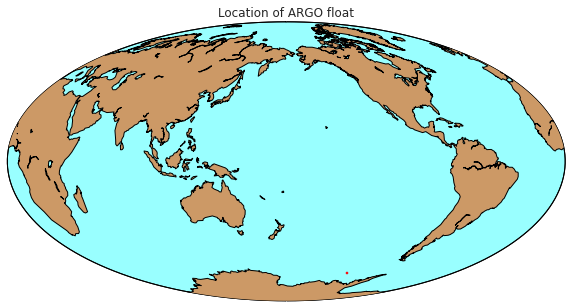

In [116]:
print"\n\n3.1.1) all three variables are 1x56\
\n3.1.2) The profile is located at 66.76S and 101.36W in the Southern Ocean.\
\n3.1.3) The python obsect is an xray.Dataset."

lon = -101.36
lat = -66.76

from mpl_toolkits.basemap import Basemap
plt.figure(figsize=(10,10))     # initiate plot w/ dimensions.
map = Basemap(projection='hammer',lon_0=180)
map.drawcoastlines()
map.fillcontinents(color='#cc9966',lake_color='#99ffff')
map.drawmapboundary(fill_color='#99ffff')
x,y = map(lon, lat)
map.scatter(x,y,5,marker='o',color='r')
plt.title('Location of ARGO float',fontsize=12)
plt.show()

# pressure
p = argo.pres[0]
# practical salinity
psal = argo.psal[0]
# in-situ temperature
t = argo.temp[0]


Now use the Gibbs sea water (``gsw``) module to calculate the following

1. $S_A$, absolute salinity (hint: you need the latitude and longitude--why?)
2. $\Theta$, conservative temperature
3. Water column height $z$

Then make plots of $S_A$ and $\Theta$ vs $z$. Include axis labels and titles.

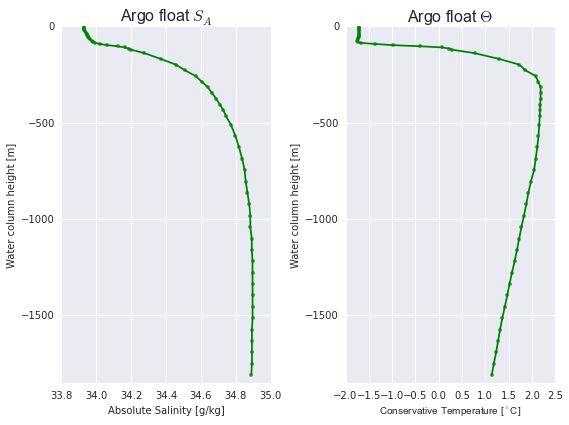

In [117]:
#3.2.1 Absolute salinity"
Sa=sw.SA_from_SP(psal,p,lon,lat)
#3.2.2 Conservative temperature"
Tc = sw.CT_from_t(Sa,t,p)
#3.2.3 Water column height"
z=sw.z_from_p(p,lat)

lblSize = 12
fig,ax = plt.subplots(ncols=2,figsize=(8,6))   
ax[0].set_xlabel('Absolute Salinity [g/kg]',size=lblSize )
ax[0].set_ylabel('Water column height [m]',size=lblSize )
ax[0].scatter(Sa,z ,marker='o',s=12,\
                   color='g',
                    alpha=.7,zorder=10)
ax[0].plot(Sa,z,'g')
ax[0].set_title(r'Argo float $S_A$',size=16)

    
ax[1].set_xlabel(r'Conservative Temperature [$^\circ$C]',size=lblSize)
ax[1].set_ylabel('Water column height [m]',size=lblSize)
ax[1].scatter(Tc,z ,marker='o',s=12,\
                   color='g',
                    alpha=.7,zorder=10)
ax[1].plot(Tc,z,'g')
ax[1].set_title(r'Argo float $\Theta$',size=16)
[a.set_ylim([-1850,0]) for a in ax]
plt.tight_layout()

Finally, use ``gsw`` to calculate $\sigma_0$ (surface potential density) and $N^2$ (buoyancy frequency). Plot both vs $z$. (You will need to read the documentation on the function ``gsw.Nsquared`` carefully in order to make this work.)

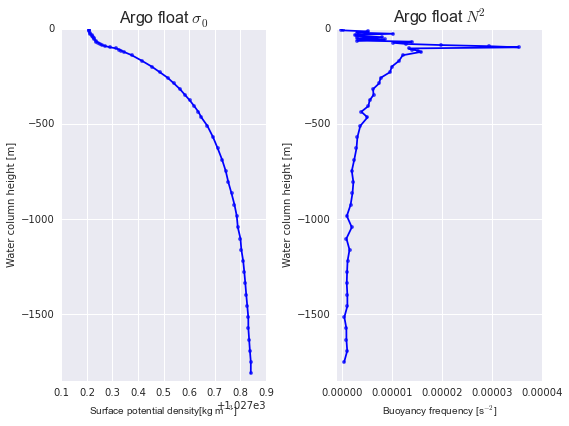

In [118]:
rh0 =  sw.rho_CT_exact(Sa,Tc,p[0])
N2,pMid  =  sw.Nsquared(Sa,Tc,p,lat)

fig,ax = plt.subplots(ncols=2,figsize=(8,6))  
ax[0].set_xlabel('Surface potential density[kg m$^{-3}$]',size=lblSize)
ax[0].set_ylabel('Water column height [m]',size=lblSize)
ax[0].scatter(rh0,z ,marker='o',s=12,\
                   color='b',
                    alpha=.7,zorder=10)
ax[0].plot(rh0,z,'b')
ax[0].set_title(r'Argo float $\sigma_0$',size=16)

  
ax[1].set_xlabel('Buoyancy frequency [s$^{-2}$]',size=lblSize)
ax[1].set_ylabel('Water column height [m]',size=lblSize)
ax[1].set_xlim(-1e-6,4e-5) 
ax[1].scatter(N2,z[:-1] ,marker='o',s=12,\
                   color='b',
                    alpha=.7,zorder=10)
ax[1].plot(N2,z[:-1],'b')
ax[1].set_title(r'Argo float $N^{2}$',size=16)

[a.set_ylim([-1850,0]) for a in ax]
plt.tight_layout()

Based on the figures you just made, discuss this profile a bit. Is the stratification dominated by salinity or temperature? Is it typical of the global ocean?

The homogenous mixed-layer occurs in the first ~100 m, followed by a steep decrease in each profile at the thermo/halocline. Potential density deceases with depth indiciating stablity, the Buoyancy frequency is greatest in the thermo/halocline.
Statification is dominated by a homogenous temperature of the mixed layer, but driven by the density changes from salinity.
This mixed-layer veritcal profile is not unique to the Southern Ocean, but rather emblematic of the vertical profile of the global ocean." 

## 4) Sensible heat flux

_(NOTE: the following problems mostly do not involve ``gsw``. You can still use python as a calculator if you wish.)_

Let's assume that initially the ocean and atmosphere are in a balanced state, with no turbulent heat exchange and $T = T_{10} = 20^\circ$C. Suddenly a cold front comes through and the air temperature drops suddenly to 18$^\circ$C. Assume there is no ocean current and that the atmospheric winds are blowing at 10 m/s. You can also assume that $C_H = 10^{-3}$.

1. Calculate the sensible heat flux immediately after this drop in air temperature.
1. Assume the mixed layer is 50 m deep. Calculate the instantaneous rate of mixed layer cooling immediately after the drop in air temperature. Express your answer in degrees per day.
1. This cooling rate cannot be maintained. As the mixed layer cools and the ocean temperature approaches the air temperature, the sensible heat flux will become weaker. Derive an equation describing the time evolution of the air-sea temperature difference $T' = T - T_{10}$, assuming $T_{10}$ remains fixed. ($T'$ is positive when the water is warmer than the air.) You should find an equation of the form
$$ \frac{dT'}{dt} = - \lambda T' $$
The constant $\lambda$ is an inverse timescale. Express $\lambda$ first in terms of the other parameters and then find its value. Give your answer in the units days$^{-1}$. In your own words, what does $\lambda$ represent? How does it depend on the mixed layer depth? The wind speed?
1. This equation is a simple linear, first-order ordinary differential equation. Write the solution for $T'(t)$. How long does it take the initial air-sea difference of 2$^\circ$C to be reduced by half? How does this compare with the initial cooling rate you calculated in part (b)?

5.1) The sensible heat flux following the drop in atm temp is -26.78 W m^-2.
5.2) The instantaneous rate of mixed layer cooling immediately after the drop in air temperature is, -0.044 K day^-1


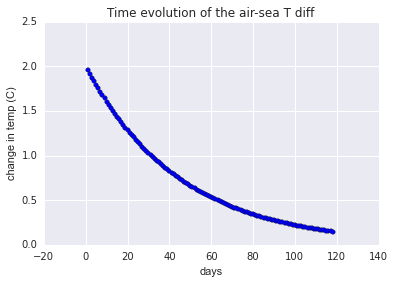

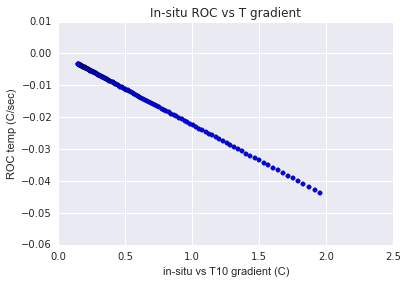

In [120]:
# Params
h   = 50    # m MLD
rho0= 1027  # kg m-3 density of seawater
s2d = 86400 # conversion from seconds -> day

u10 = 10    # m/s wind speed at 10m
u   = 0     # m/s current speed in Ocean surf
T10 = 18    # C temp at 10m
T   = 20    # C in-situ temp (note units can be K since difference is taken)
Ch  = 1e-3  # stability-dependent bulk transfer coeff for heat
CpA = 1030  # J kg-1 K-1 specific heat of air
pA  = 1.3   # kg m-3 density of air

# 4.1 Calcluate sensible heat w/ units: J m-2 s-1 = W m-2
Qs = pA*CpA*Ch*abs(u10-u)*(T10-T)
print"5.1) The sensible heat flux following the drop in atm temp is",Qs,"W m^-2."

# 4.2 Calculate the heat flux units: W/ J K-1 = K s-1
dT = (Qs/(h*CpA*rho0))*s2d
print"5.2) The instantaneous rate of mixed layer cooling immediately after the drop in air temperature is,",round(dT,SF),"K day^-1"

# 4.3 and 4.4 for graphing purposes
# Params
T10 = 18
T   = 20
day = 0
Tp  = T-T10 # C sea-air temperature gradient
TpList = np.zeros(118)
TpList[0] = Tp # List of sea-air temperature gradient for plotting...
Tlist =np.zeros(118)
dTlist = np.zeros(118)
days= np.zeros(118)
for i in range(118):
    days[i]=i+1
while(Tp > .15): # towards convergence of T to T10
    Qs = pA*CpA*Ch*abs(u10-u)*(T10-T) 
    dT = (Qs/(h*CpA*rho0))*s2d
    T = T+dT
    Tp = T-T10
    #book-keeping...      
    TpList[day] = T-T10
    Tlist[day] = T
    dTlist[day]=dT
    day=day+1
plt.scatter(days,TpList)
#plt.plot(Tlist,TpList)
#plt.xlim(18,19.5)
#plt.ylim(0,1.5)
plt.title("Time evolution of the air-sea T diff")
plt.ylabel('change in temp (C)')
plt.xlabel('days')
plt.show()
plt.scatter(TpList,dTlist)
plt.title("In-situ ROC vs T gradient")
plt.ylabel('ROC temp (C/sec)')
plt.xlabel('in-situ vs T10 gradient (C) ')
plt.show()

4.3) 
dT'/dT = -λ (T')
1/dT * dT' = -λ (T+C)
ln(T') = -λ (T+C)
T' = e^-λ (T+C) = e^-λT * e^-λC
...substitite T' = 2 and T = 0
2  = e^λ(0)*e^λc
2  = e^λc

4.4)
since T' = e^-λT * e^-λC,
T' = e^-λT * 2
...so for T' = 1
1 = e^-λT * 2
ln(1/2) =  -λT
... T = 19 too
ln(1/2)/19 = λ

The in-situ temperature hits 19C 30 days after the initial atmospheric temperature shift (verified using Tlist).
The instantaenous change is -0.022 K day^1  which is half the initial -0.044 K day^-1 rate. As the temperature gradient between the sea and air degreases, so too does the cooling rate in a linear fashion.

## 5) Evaporation and Latent Heat Flux

We will now calculate the evaporation and latent heat flux due to the same event. Cold air can hold much less water vapor than warm air. The Clausius-Clapeyron equation describes the maximum amount of water vapor that air can hold. The humidity of air is often expressed as _relative humidity_, i.e. $q$ as a percentage of $q_{sat}(T)$.

1. What is $q_{sat}$, the specific humidity of the right at the sea surface? (The water temperature is 20$^\circ$C, and the air right at the surface is always 100% saturated.)
1. Assume that the air in the cold front has 50% relative humidity at 10 m above the sea surface. What is $q_{10}$? (Recall that $T_{10} = 18^\circ$C.)
1. Calculate the evaporation rate immediately after the drop in air temperature. What are the units of $E$? Rainfall is often measured in units of mm per day. Can you convert your answer to these units?
1. Calculate the instantaneous rate of change of the mixed layer salinity due to evaporation immediately after the drop in air temperature using the virtual salt flux approximation. Assume that the average salinity of the mixed layer $S_{A0} = 35$ g/kg.
1. Calculate the latent heat flux corresponding with this evaporation rate.
1. Sensible heat fluxes can be both positive and negative over the ocean, depending on whether the air temperature is warmer or cooler than the water. As a result, large cancellations occur, and sensible heat fluxes do not contribute very much to the global heat budget. In contrast, latent heat loss is only negative, and strongly cools the ocean as a whole. Why is latent heat flux always negative?


In [121]:
import math
#5.1
T = 20+273
# Calculating (saturated) specific humidity same B/C rel Hum = 100%
qsat0 = 0.98*((6.4e5/pA))*math.exp((-5107.4)/T) #unitless or g water/kg air
print "5.1) qsat at SS is",round(qsat0,SF),"g/kg"

#5.2
T10 = 18+273
# Calculating saturated specific humidity at 10m
qsat10 = 0.98*((6.4e5/pA))*math.exp((-5107.4)/T10)
# Calculating specific humidity at 50% relative humidity Q = q/q* * 100%
q10 = qsat10/.50 #unitless or g water/kg air
print "5.2) q10 is",round(q10,SF),"g/kg"

#5.3
cE = Ch # exchange coefficient for water vapor
# calculate evaporation rate 
E   = -pA*cE*abs(u10-u)*(q10-qsat0)
Emm = E*s2d # convert to mm/day (note kg m-2 == mm)
print"5.3) The evaporation rate is",round(Emm,SF),"mm/day"

#5.4
SA0 = 35.0  # g/kg  average salinity of the mixed layer
P   = 0     # kg / m2 s percipitation flux
R   = 0     # kg / m2 s runoff flux

# Calculate instantaneous rate of change of MLS units: 
F=(E-P-R)*(SA0/(rho0*(1-SA0)))
print"5.4) the instantaneous change of salinity in the mixed layer is",F,"g/kg m^2 s^-1"


#5.5
Le  = 2.5e6 # J / kg latent heat of vaporization
# Calculate latent heat flux units: J / m^2 s = W / m^2
Qlh = -Le*E
print"5.5) the latent heat flux from the evaporation rate is",round(Qlh,SF),"W m^-2."

print"5.6) As the sun warms the Ocean, water at the surface uses the excess energy in the Ocean surface to evaporate--resulting in a cooling effect much like sweat on our skin. This hot water vapor rises and cools to form clouds."

5.1) qsat at SS is 0.013 g/kg
5.2) q10 is 0.023 g/kg
5.3) The evaporation rate is -11.283 mm/day
5.4) the instantaneous change of salinity in the mixed layer is 1.30891524059e-07 g/kg m^2 s^-1
5.5) the latent heat flux from the evaporation rate is 326.462 W m^-2.
5.6) As the sun warms the Ocean, water at the surface uses the excess energy in the Ocean surface to evaporate--resulting in a cooling effect much like sweat on our skin. This hot water vapor rises and cools to form clouds.


## 6) OPTIONAL Bonus Question: Total Density Flux

All of these processes (sensible heat loss, evaporation, and latent heat loss) are making the mixed layer denser. Let's compare their effect

1. Combine the equations for the rate of change of $T$ and $S_A$ together to form an expression for the rate of change of density $\rho$. (You may assume for simplicity that $T=\Theta$.) You will need to use the equation of state. (Since the pressure changes over the mixed layer are small, you should neglect the dependence of density on pressure.)
1. Quantify the densification rate of the mixed layer due to each process immediately following the change in air temperature. Use ``gsw`` to calculate the appropriate thermal expansion and haline contraction coefficients. Express your answer in kg m$^{-3}$ per day. Which is the dominant process?
1. The mixed layer is the lightest (least dense) water in the water column. It overlies the stratified pycnocline. What happens when air-sea fluxes cause the mixed layer to become denser than the water below it?


In [122]:
print"6.2) The dominant process is salinity."
print"6.3) If the mixed layer becomes more dense than the water below, convection occurs in the form of a deepening mixed layer. This often occurs in the Winter as cold air and brine injection (from sea ice formation) increases the density of surface waters and causes turbulent vertical mixing."

6.2) The dominant process is salinity.
6.3) If the mixed layer becomes more dense than the water below, convection occurs in the form of a deepening mixed layer. This often occurs in the Winter as cold air and brine injection (from sea ice formation) increases the density of surface waters and causes turbulent vertical mixing.
